In [1]:
!wget https://github.com/ladofa/edu/raw/master/samples/sudoku.png
!wget https://github.com/ladofa/edu/raw/master/samples/seven.png

--2023-07-28 01:19:22--  https://github.com/ladofa/edu/raw/master/samples/sudoku.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ladofa/edu/master/samples/sudoku.png [following]
--2023-07-28 01:19:23--  https://raw.githubusercontent.com/ladofa/edu/master/samples/sudoku.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 250720 (245K) [image/png]
Saving to: ‘sudoku.png’

sudoku.png          100%[===================>] 244.84K  --.-KB/s    in 0.004s  

2023-07-28 01:19:23 (61.6 MB/s) - ‘sudoku.png’ saved [250720/250720]

--2023-07-28 01:19:23--  https://github.com/ladofa/edu/raw/master/samples/

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
src = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)#그레이로 조정

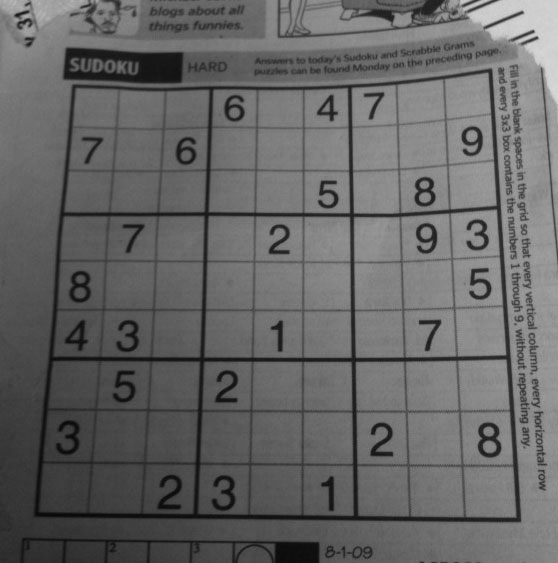

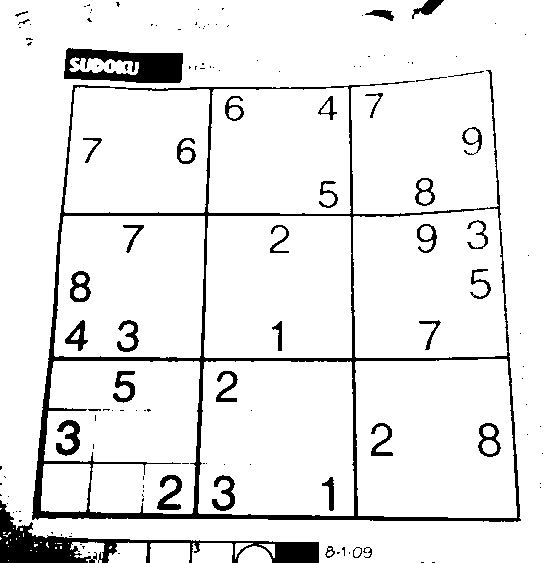

In [12]:
cv2_imshow(src)
cv2_imshow((src >50)*255)

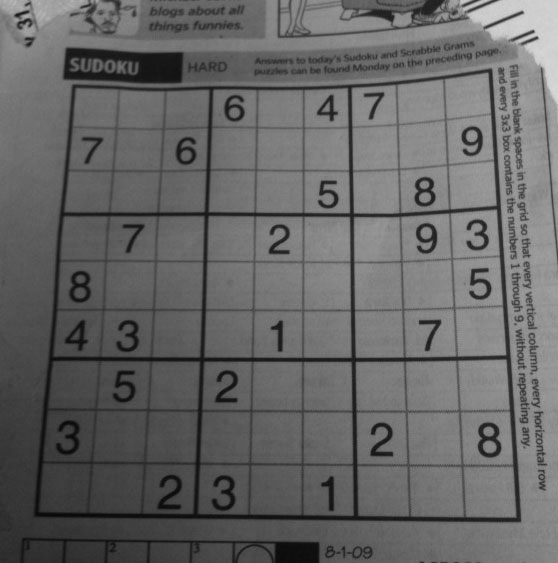

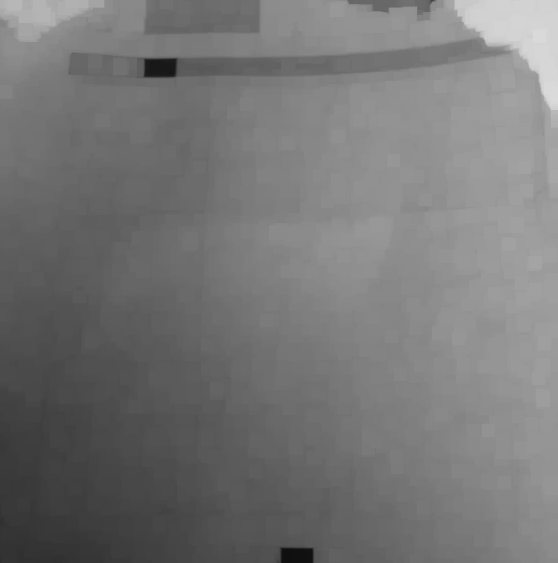

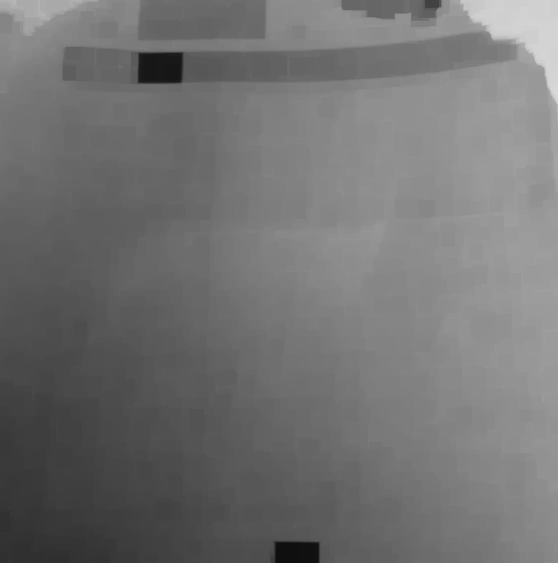

In [13]:
cv2_imshow(src)
back = cv2.dilate(src, np.ones((3, 3), np.uint8), iterations=6)# 모폴리지 팽창연산 - 배경이 큰 부분의 색이 팽창하여 검은색을 침식하도록 팽창함
cv2_imshow(back)
back = cv2.erode(back, np.ones((3, 3), np.uint8), iterations=6)# 모폴리지 침식연산 - 선명하지 않은 픽셀을 선명하게 보이게 침식함
cv2_imshow(back)

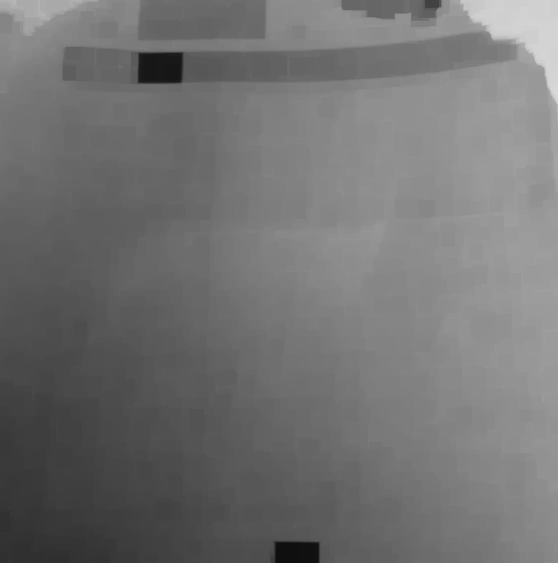

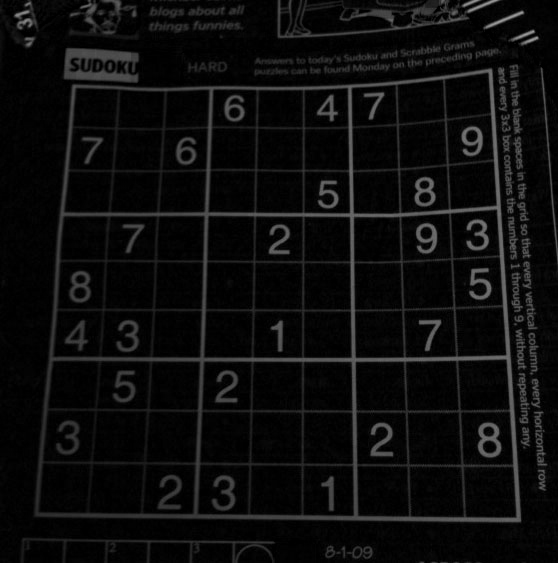

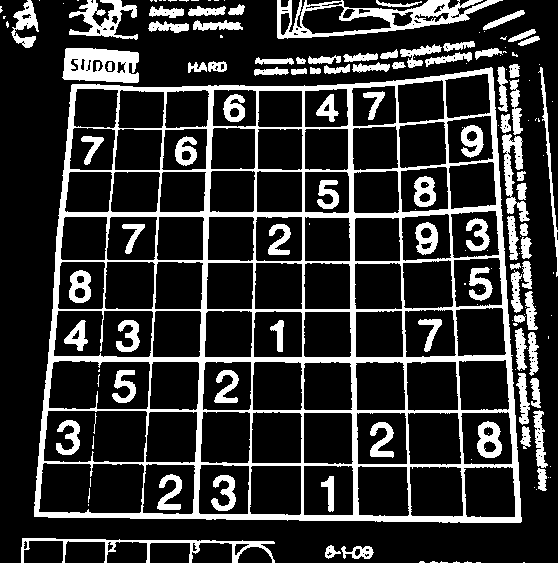

In [15]:
back = cv2.dilate(src, np.ones((3, 3), np.uint8), iterations=6)
back = cv2.erode(back, np.ones((3, 3), np.uint8), iterations=6)
fore = cv2.absdiff(back, src) # 두이미지의 절대값 차이를 계산하는 함수
cv2_imshow(back)
cv2_imshow(fore)
_, bin = cv2.threshold(fore, 15, 255, cv2.THRESH_BINARY)
cv2_imshow(bin)

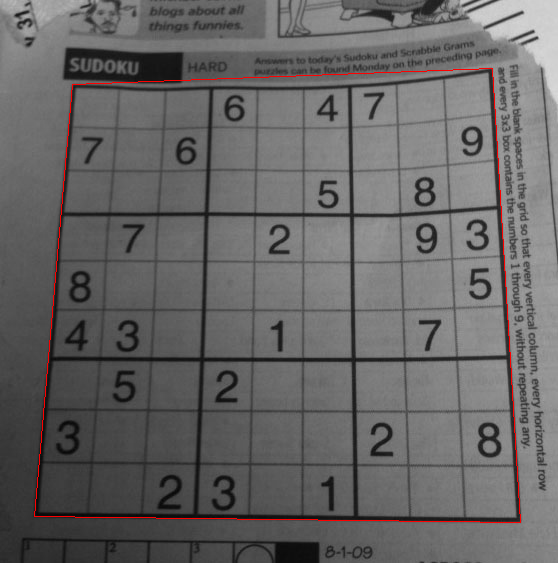

In [23]:
contours, hierarchy = cv2.findContours(bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #contours는 좌표값 가져오고 hierarchy 는 부모노드와 자식노드를 연결해줌
hierarchy = hierarchy[0]

lengthes = [cv2.arcLength(con, True) for con in contours]
maxLen = np.max(lengthes)
maxIndex = np.argmax(lengthes)
maxCon = contours[maxIndex]

# maxLen = 0
# maxCon = None
# for con in contours:
#     length = cv2.arcLength(con, True)
#     if length > maxLen:
#         maxLen = length
#         maxCon = con

out = cv2.approxPolyDP(maxCon, maxLen * 0.02, True)
contours = list(contours)
contours[0] = out
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
cv2.drawContours(dst, contours, 0, (0, 0, 255))
cv2_imshow(dst)

In [24]:
out.shape

(4, 1, 2)

In [25]:
out = out.reshape(4, 2)
out

array([[492,  68],
       [ 72,  84],
       [ 34, 516],
       [520, 522]], dtype=int32)

In [26]:
a = np.array([1, 3, 2, 4, 0, 9])
a[[2, 0, 1, 1, 1]] # a 인덱싱


array([2, 1, 3, 3, 3])

In [27]:
out = out.reshape(4, 2)

x = out[:, 0]
y = out[:, 1]
m = x - y
rt = np.argmax(m) #오른쪽 최대 위치값
lb = np.argmin(m) # 왼쪽 최소 위치값
s = x + y
lt = np.argmin(s) #왼쪽 최소값
rb = np.argmax(s)# 오른쪽 최대값

srcPoints = out[[lt, rt, rb, lb]].astype(np.float32)
srcPoints

array([[ 72.,  84.],
       [492.,  68.],
       [520., 522.],
       [ 34., 516.]], dtype=float32)

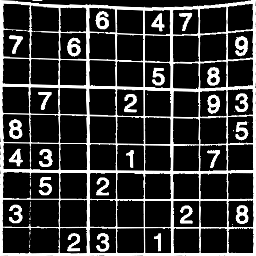

In [28]:
dstPoints = np.array([[0, 0], [255, 0], [255, 255], [0, 255]], np.float32)
M = cv2.getPerspectiveTransform(srcPoints, dstPoints) # 원근변환 매트릭스 생성(3차원 변환)
rectified = cv2.warpPerspective(bin, M, (256, 256)) # 원근변환 적용
cv2_imshow(rectified)

In [29]:
temp = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(temp)

In [30]:
temp.shape

(22, 22)

In [31]:
res = cv2.matchTemplate(rectified // 255, temp // 255, cv2.TM_SQDIFF)
res.shape

(235, 235)

In [32]:
res.dtype

dtype('float32')

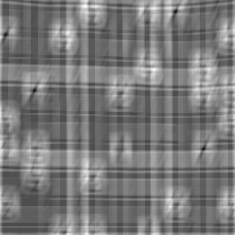

In [33]:
cv2_imshow(res)

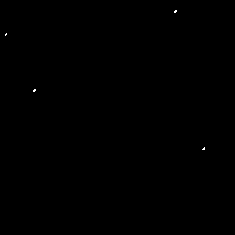

In [34]:
cv2_imshow( (res < 50) * 255)

In [35]:
a = np.arange(16).reshape(4, 4) * 10
a

array([[  0,  10,  20,  30],
       [ 40,  50,  60,  70],
       [ 80,  90, 100, 110],
       [120, 130, 140, 150]])

In [36]:
a[[1, 3, 1], [1, 2, 3]]

array([ 50, 140,  70])

In [37]:
a = [1, 3, 2, 2]
b = [4, 3, 2, 1]
c = list(zip(a, b))
c

[(1, 4), (3, 3), (2, 2), (2, 1)]

In [38]:
sorted(c)

[(1, 4), (2, 1), (2, 2), (3, 3)]

In [39]:
(2, 2) > (2, 1)

True

In [40]:
a = [1, 2, 3, 4]
#b = [2, 4, 6, 8]

b = []
for elem in a:
    b.append(elem * 2)
b

[2, 4, 6, 8]

In [41]:
def f(elem):
    return elem * 2
b = [f(elem) for elem in a]
b

[2, 4, 6, 8]

In [42]:
list(map(f, a))

[2, 4, 6, 8]

In [43]:
y, x = np.where(res < 50) #조건에 맞는 위치들을 모두 찾아줌
v = res[y, x]
list(zip(v, x, y))

[(46.0, 175, 10),
 (42.0, 176, 10),
 (44.0, 174, 11),
 (16.0, 175, 11),
 (30.000015, 176, 11),
 (46.0, 174, 12),
 (32.0, 175, 12),
 (46.000008, 6, 33),
 (22.0, 5, 34),
 (28.0, 6, 34),
 (36.000015, 5, 35),
 (44.0, 34, 89),
 (46.0, 35, 89),
 (36.0, 33, 90),
 (0.0, 34, 90),
 (36.0, 35, 90),
 (45.999992, 33, 91),
 (44.0, 34, 91),
 (43.0, 204, 147),
 (19.000008, 203, 148),
 (31.0, 204, 148),
 (47.0, 202, 149),
 (31.0, 203, 149),
 (49.0, 204, 149)]

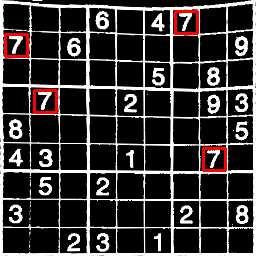

In [44]:
y, x = np.where(res < 50)
v = res[y, x]
points = [np.array([ax, ay]) for av, ax, ay in sorted(zip(v, x, y))]

# points = []
# for av, ax, ay in sorted(zip(v, x, y)):
#     point = np.array([ax, ay])
#     points.append(point)

selected = []
for p in points:
    dup = False
    for s in selected:
        if sum((p - s) ** 2) < 20:
            dup = True
            break
    if not dup:
        selected.append(p)

dst = cv2.cvtColor(rectified, cv2.COLOR_GRAY2BGR)
for s in selected:
    p1 = tuple(s)
    p2 = tuple(s + 22)
    cv2.rectangle(dst, p1, p2, (0, 0, 255), 2)
cv2_imshow(dst)